# Submission for SGH by ZACHARY LIM (malaria_death_age)

In [14]:
import sqlite3

#Python packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotnine

from plotnine import ggplot, aes, facet_grid, labs, geom_bar ,geom_line, theme , geom_point




## Extracting and reading data

Using the variable mal_dea to extract out the dataset from malaria_deaths_age.csv using read_csv() .  We then check if there are any NaN values . If they have, we replace it with the Entity code to keep the data values non-empty.

In [2]:
mal_dea_age = pd.read_csv("malaria_deaths_age.csv",index_col=False)
count_nan_in_df = mal_dea_age.isnull().sum()
print (count_nan_in_df)

col_name = list(mal_dea_age)
print(col_name)
mal_dea_age = mal_dea_age.drop(columns=col_name[0])
mal_dea_age['code'] = mal_dea_age['code'].fillna(mal_dea_age['entity'])
mal_dea_age

Unnamed: 0       0
entity           0
code          4320
year             0
age_group        0
deaths           0
dtype: int64
['Unnamed: 0', 'entity', 'code', 'year', 'age_group', 'deaths']


,entity,code,year,age_group,deaths
0,Afghanistan,AFG,1990,Under 5,184.606435
1,Afghanistan,AFG,1991,Under 5,191.658193
2,Afghanistan,AFG,1992,Under 5,197.140197
3,Afghanistan,AFG,1993,Under 5,207.357753
4,Afghanistan,AFG,1994,Under 5,226.209363
...,...,...,...,...,...
30775,Zimbabwe,ZWE,2012,50-69,103.185111
30776,Zimbabwe,ZWE,2013,50-69,100.113293
30777,Zimbabwe,ZWE,2014,50-69,99.013890
30778,Zimbabwe,ZWE,2015,50-69,98.091738


## Saving malaria_death_age into SQL 

We create a database file call "mal_dea_age.db" that will store the dataset inside. If the file does not exist, the file is created and the data is being stored inside. If it does exist, it wll just connect and run.


In [3]:
my_path = "mal_dea_age.db"

if not os.path.isfile(my_path):
    con = sqlite3.connect(my_path)
    cur = con.cursor()
    mal_dea_age.to_sql('malaria_death_age', con=sqlite3.connect(my_path))
    
    print("db file has been created and is connected successfully")

else:
    con = sqlite3.connect(my_path)
    cur = con.cursor()
    print("db file has already been created and is now connected successfully")

db file has been created and is connected successfully


## Extracting certain countries to do the data visualization

We will extract the ASEAN countries to do the data visualization. The ASEAN countries involved are Brunei, Cambodia, Indonesia, Laos, Malaysia, Myanmar, the Philippines, Singapore, Thailand, and Vietnam.

We will also just limit ourselves to just the age_group for 50 to 69 years

In [4]:
asean_df = pd.read_sql("SELECT * FROM malaria_death_age WHERE (entity in ('Brunei','Cambodia','Indonesia', 'Laos','Malaysia', 'Myanmar','Philippines','Singapore','Thailand','Vietnam') AND age_group in ('50-69')) ",con)
asean_df



,index,entity,code,year,age_group,deaths
0,25380,Brunei,BRN,1990,50-69,0.000000
1,25381,Brunei,BRN,1991,50-69,0.000000
2,25382,Brunei,BRN,1992,50-69,0.000000
3,25383,Brunei,BRN,1993,50-69,0.000000
4,25384,Brunei,BRN,1994,50-69,0.000000
...,...,...,...,...,...,...
265,30586,Vietnam,VNM,2012,50-69,235.705431
266,30587,Vietnam,VNM,2013,50-69,247.881661
267,30588,Vietnam,VNM,2014,50-69,257.566316
268,30589,Vietnam,VNM,2015,50-69,269.470129


We will then modify the dataset to ensure the year are in the index columns and the countries names are in the column names when visualizing data.

In [5]:
new_asean_df = asean_df.pivot(index = 'year', columns = 'entity', values = 'deaths').reset_index().rename_axis()
new_col_name = list(new_asean_df)
print(new_col_name)
new_asean_df = new_asean_df.set_index('year')
new_asean_df


['year', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']


entity,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
year,,,,,,,,,,
1990,0.0,222.776576,1001.587017,2.651084,5.243171,1082.383537,122.985748,0.0,64.954658,157.004672
1991,0.0,224.227412,1042.041236,2.607717,4.902879,1103.568650,117.284406,0.0,67.189940,154.180806
1992,0.0,219.127144,1108.021201,2.714478,4.644499,1109.941427,106.987385,0.0,66.785292,155.794443
1993,0.0,222.521083,1145.290092,2.677263,4.333618,1117.040897,100.177258,0.0,66.982911,156.139189
1994,0.0,218.911476,1190.053309,2.765211,3.995037,1114.935163,88.576025,0.0,66.259574,158.074222
1995,0.0,221.693917,1198.999487,2.688108,3.673532,1114.108939,79.046533,0.0,66.401232,156.725073
1996,0.0,217.024395,1220.434884,2.841444,3.541156,1118.987148,67.434206,0.0,67.200014,160.196788
1997,0.0,222.122288,1265.267604,2.783206,3.423812,1119.584524,58.993426,0.0,65.179905,161.245961
1998,0.0,213.664624,1277.308896,2.766741,3.409782,1144.940482,52.847942,0.0,63.233080,157.287828


## Data visualization

Text(0, 0.5, 'deaths')

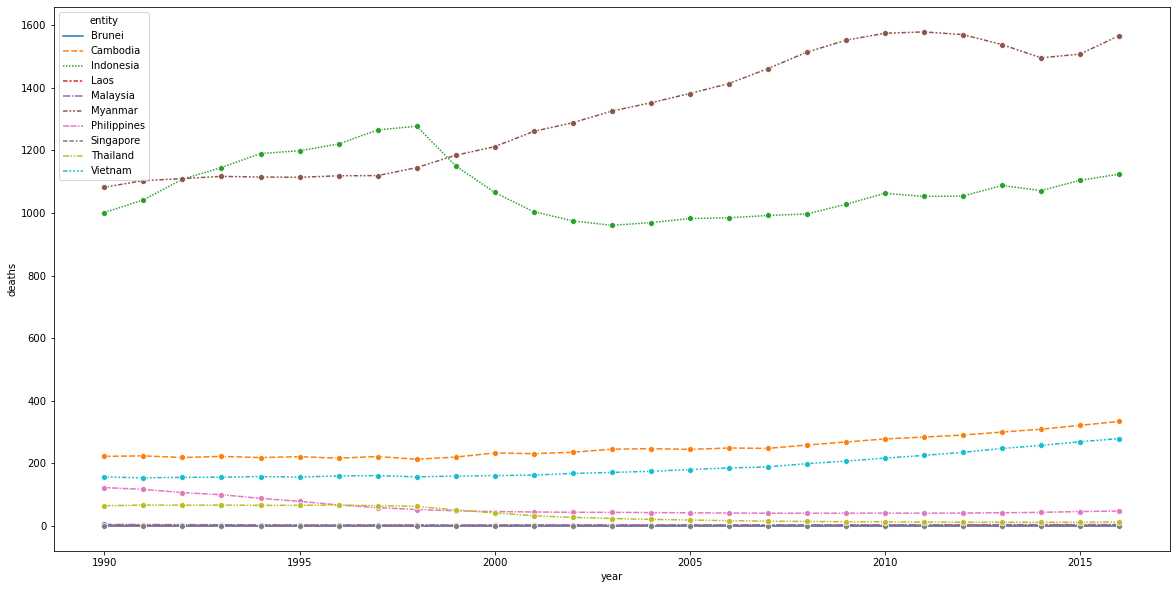

In [6]:
plt.figure(figsize=(20,10))

sns.lineplot(data = new_asean_df , marker = 'o')
plt.ylabel("deaths")

<AxesSubplot:xlabel='entity', ylabel='deaths'>

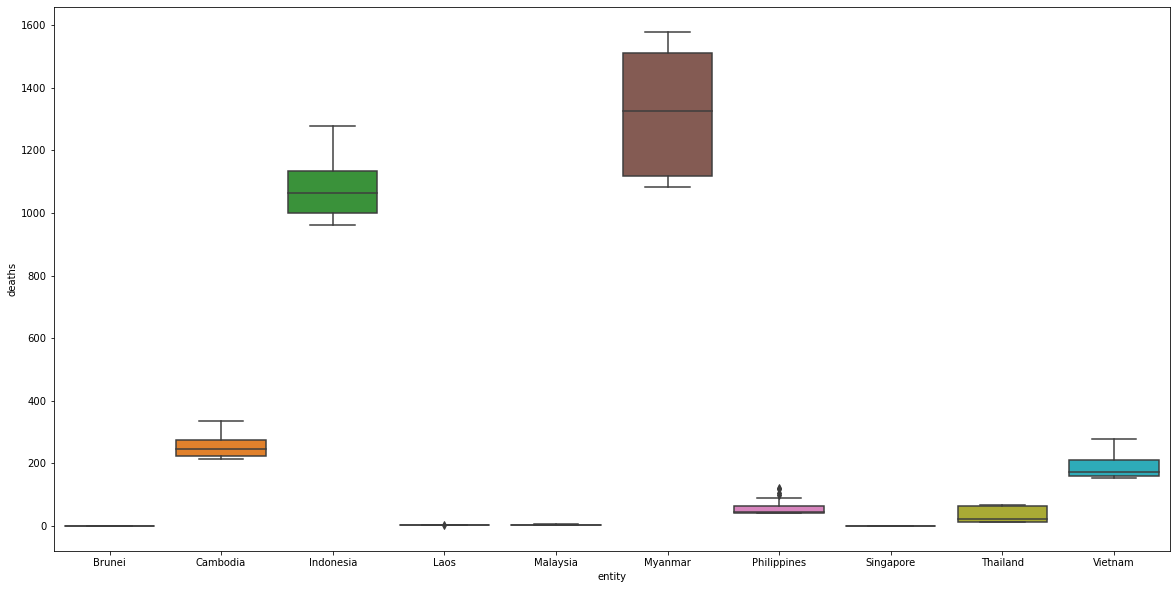

In [7]:
plt.figure(figsize=(20,10))

sns.boxplot(data = asean_df, x="entity" , y="deaths")

## Another data extraction via selecting year 2016

We will now extract from SQL Database with a condition of getting in year 2016 itself.

In [8]:
asean_df2 = pd.read_sql("SELECT * FROM malaria_death_age WHERE (entity in ('Brunei','Cambodia','Indonesia', 'Laos','Malaysia', 'Myanmar','Philippines','Singapore','Thailand','Vietnam') AND year in ('2016')) ",con)
asean_df2

,index,entity,code,year,age_group,deaths
0,782,Brunei,BRN,2016,Under 5,0.000000
1,890,Cambodia,KHM,2016,Under 5,294.451682
2,2564,Indonesia,IDN,2016,Under 5,281.429628
3,2942,Laos,LAO,2016,Under 5,4.528089
4,3320,Malaysia,MYS,2016,Under 5,1.057846
5,3725,Myanmar,MMR,2016,Under 5,566.312592
6,4319,Philippines,PHL,2016,Under 5,10.273021
7,4805,Singapore,SGP,2016,Under 5,0.000000
8,5453,Thailand,THA,2016,Under 5,0.791805
9,5966,Vietnam,VNM,2016,Under 5,96.689580


In [9]:
new_asean_df2 = asean_df2.pivot(index = 'age_group', columns = 'entity', values = 'deaths').reset_index().rename_axis()
new_asean_df2

entity,age_group,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
0,15-49,0.0,1262.818992,2339.404163,11.025833,8.384353,3808.745878,100.040819,0.0,22.652679,550.367934
1,5-14,0.0,163.898407,211.690485,1.179484,0.675649,487.132110,8.676827,0.0,0.890877,48.886247
2,50-69,0.0,334.237904,1124.051331,3.281394,4.983688,1566.333455,48.000647,0.0,13.319105,279.487378
3,70 or older,0.0,88.314542,976.952335,1.569666,2.100474,473.585621,18.720740,0.0,6.174380,152.587626
4,Under 5,0.0,294.451682,281.429628,4.528089,1.057846,566.312592,10.273021,0.0,0.791805,96.689580


In [10]:
new_col_name2 = list(new_asean_df2)
print(new_col_name)
new_asean_df2 = new_asean_df2.set_index('age_group')
new_asean_df2


['year', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']


entity,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
age_group,,,,,,,,,,
15-49,0.0,1262.818992,2339.404163,11.025833,8.384353,3808.745878,100.040819,0.0,22.652679,550.367934
5-14,0.0,163.898407,211.690485,1.179484,0.675649,487.132110,8.676827,0.0,0.890877,48.886247
50-69,0.0,334.237904,1124.051331,3.281394,4.983688,1566.333455,48.000647,0.0,13.319105,279.487378
70 or older,0.0,88.314542,976.952335,1.569666,2.100474,473.585621,18.720740,0.0,6.174380,152.587626
Under 5,0.0,294.451682,281.429628,4.528089,1.057846,566.312592,10.273021,0.0,0.791805,96.689580


## Data Visualization for year 2016

<AxesSubplot:xlabel='entity', ylabel='deaths'>

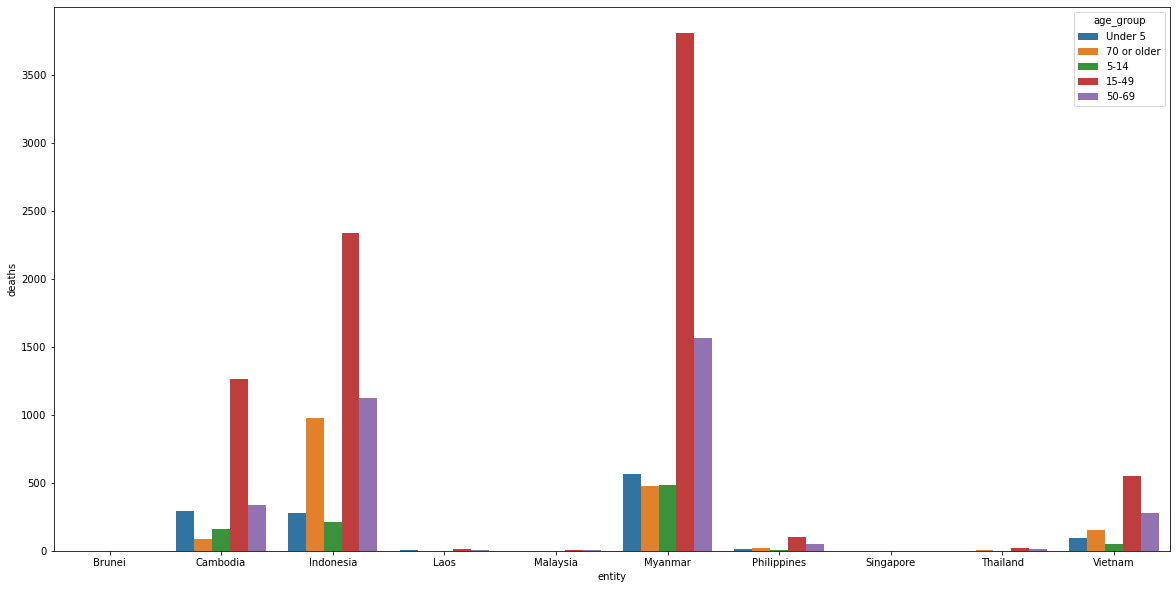

In [11]:
plt.figure(figsize=(20,10))

sns.barplot(x = 'entity' , y= 'deaths' , hue = 'age_group', data = asean_df2)

## Using ggplot from year 1990 to 2016 on ASEAN Countries


In [12]:
asean_total = pd.read_sql("SELECT * FROM malaria_death_age WHERE (entity in ('Brunei','Cambodia','Indonesia', 'Laos','Malaysia', 'Myanmar','Philippines','Singapore','Thailand','Vietnam'))",con)

asean_total

,index,entity,code,year,age_group,deaths
0,756,Brunei,BRN,1990,Under 5,0.000000
1,757,Brunei,BRN,1991,Under 5,0.000000
2,758,Brunei,BRN,1992,Under 5,0.000000
3,759,Brunei,BRN,1993,Under 5,0.000000
4,760,Brunei,BRN,1994,Under 5,0.000000
...,...,...,...,...,...,...
1345,30586,Vietnam,VNM,2012,50-69,235.705431
1346,30587,Vietnam,VNM,2013,50-69,247.881661
1347,30588,Vietnam,VNM,2014,50-69,257.566316
1348,30589,Vietnam,VNM,2015,50-69,269.470129


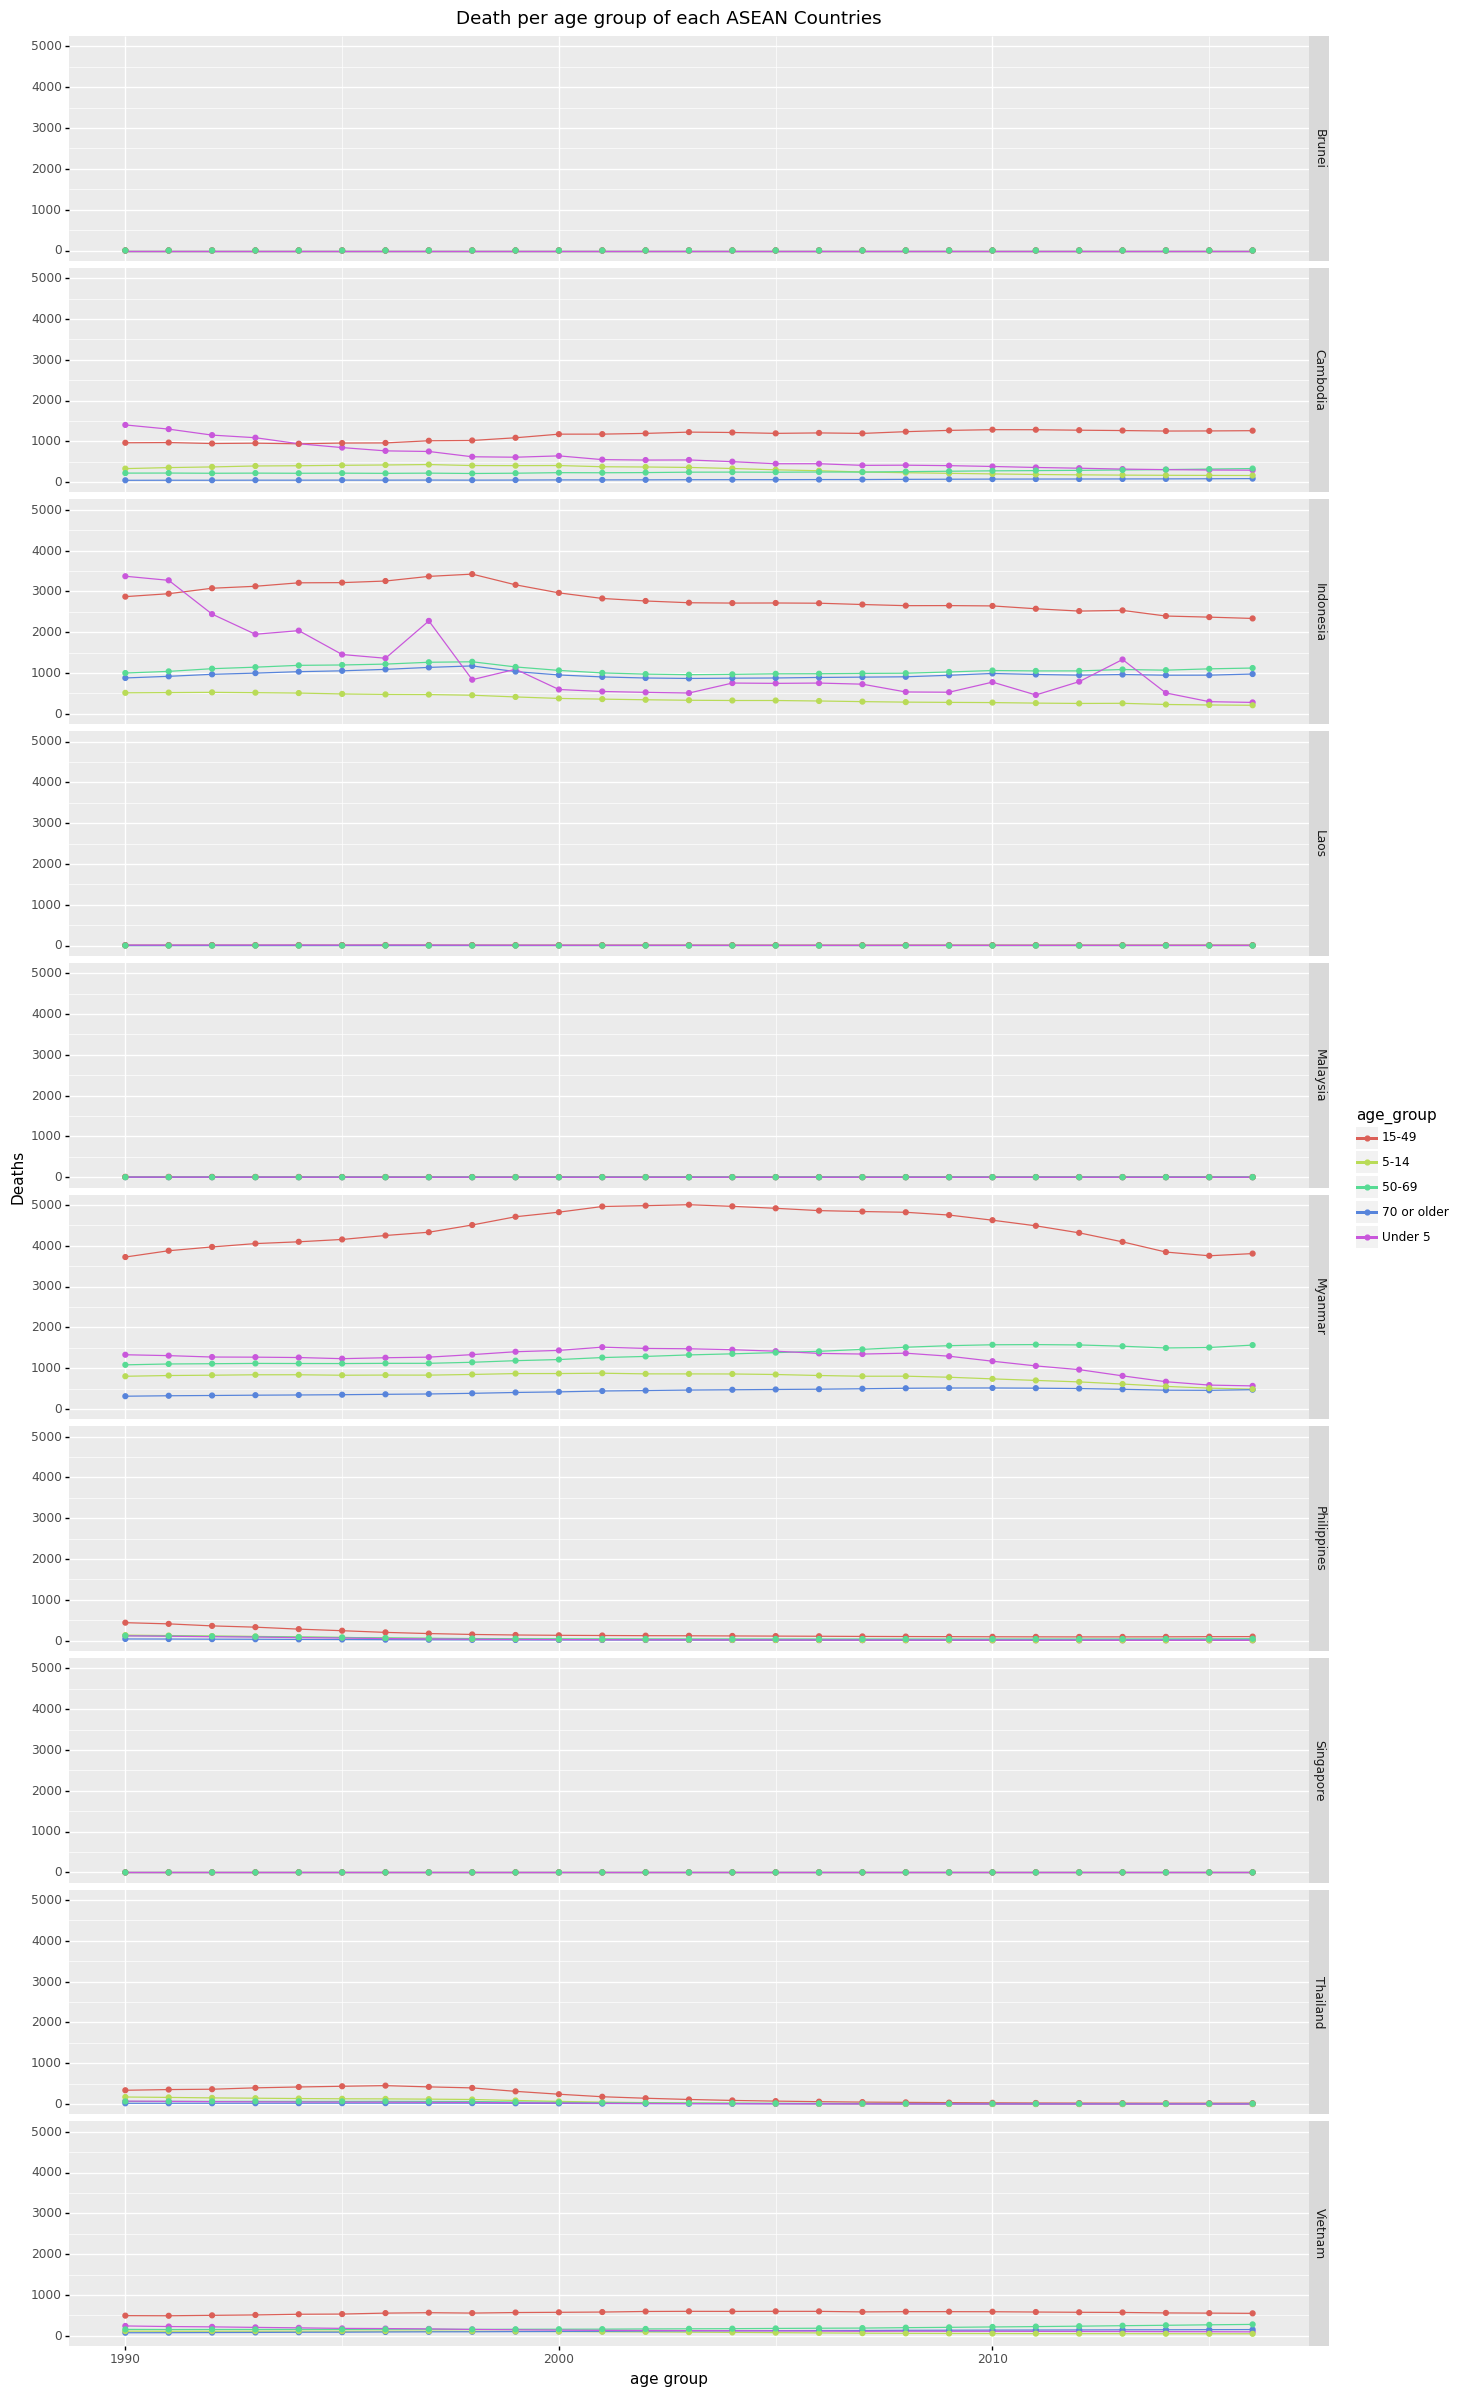

<ggplot: (111719691165)>

In [15]:
(
    ggplot(asean_total,
           aes(x = 'year', y = 'deaths', group = 'age_group'))
    + facet_grid(facets="entity ~ .")
    + labs(
        x="age group",
        y="Deaths",
        title="Death per age group of each ASEAN Countries")
    
    + geom_line(aes(color= 'age_group'))
    + geom_point(aes(color = 'age_group'))
    + theme(figure_size=(16, 30))
    )

## Closing Programs

closing programs that we are done using

In [19]:
con.close()